## Topics
- Scikit learn Intro
- Regression Models
    - Types of regression models

### Scikit learn
- sklearn is one of the modt important library to build machine learning algorithms.
- https://scikit-learn.org/stable/

### Regression
 - If target column contains continous values, then we can apply regression modles.
 - Regression model is used to analyze relationship between variables

#### Types
 - Simple Linear Regression
 - Multiple Linear Regression
 - Polynomial Regression

### 1. Simple Linear Regression
- In simple linear regression we can analyze relationship between one independent variable and dependent variable
    - Eg: Size of Land --> Independent variable, Prize of land --> Target
- **Formula: Y = mX  + C**
- Y = b0 + b1 * X
    - b0 --> Intercept
    - b1 --> Slope
    - X ---> Independent variable
    - Y ---> Dependent variable

- **Slope Formula**

In [1]:
###       (Xi - mean(X)) * (Yi - mean(Y))
### b1 = -----------------------------------
###           (Xi - mean(X)) ^ 2

- **Y-Intercept formula**

In [2]:
### b0 = maen(Y) - (b1 * mean(X))

In [3]:
import numpy as np
import pandas as pd

In [4]:
## Sample dataset
df = pd.DataFrame({'Head Size': [1,2,3,4,5], 
                   'Brain weight' : [3,4,5.4,7,8.8]})
df

,Head Size,Brain weight
0,1,3.0
1,2,4.0
2,3,5.4
3,4,7.0
4,5,8.8


In [5]:
X = df['Head Size']
Y = df['Brain weight']

In [7]:
print(len(X))
print(np.mean(X))
print(np.mean(Y))

5
3.0
5.64


In [8]:
numerator = 0
denominator = 0

for i in range(len(X)):
    numerator = numerator + (X[i] - np.mean(X)) * (Y[i] - np.mean(Y))
    denominator = denominator + (X[i] - np.mean(X)) ** 2
    
b1 = numerator / denominator

print(b1) ## Slope

1.4600000000000002


In [10]:
b0 = np.mean(Y) - (b1 * np.mean(X))
print(b0)# Intercept

1.259999999999999


In [11]:
y_predict1 = b0 + (b1 * X)
y_predict1 ## Predicted result

0    2.72
1    4.18
2    5.64
3    7.10
4    8.56
Name: Head Size, dtype: float64

- **To apply any machine learning model, we need to follow few steps**
    - Step1: Load the dataset
    - Step2: Seperate the dataset into independent and dependent variables
    - Step3: Split the dataset for training and testing
    - Step4: Import requred models
    - Step5: Create the model and fit it to our dataset.
    - Step6: Predict the result and check the accuracy.

- **Now Linear regression model**

In [12]:
# Load the dataset
df = pd.DataFrame({'Head Size': [1,2,3,4,5], 
                   'Brain weight' : [3,4,5.4,7,8.8]})
df

,Head Size,Brain weight
0,1,3.0
1,2,4.0
2,3,5.4
3,4,7.0
4,5,8.8


In [15]:
# Seperate the dataset into independent and dependent variables
X = df[['Head Size']]   ## Independent 
Y = df['Brain weight']  ## Dependent

In [14]:
# Import requred models
from sklearn.linear_model import LinearRegression

In [16]:
np.ndim(X)

2

In [17]:
np.ndim(Y)

1

In [18]:
lin_reg1 = LinearRegression()

In [19]:
# fit the model
lin_reg1.fit(X, Y) ## training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
## Predict the result
y_predict1 = lin_reg1.predict(X)
y_predict1

array([2.72, 4.18, 5.64, 7.1 , 8.56])

In [21]:
Y

0    3.0
1    4.0
2    5.4
3    7.0
4    8.8
Name: Brain weight, dtype: float64

In [22]:
lin_reg1.coef_  # slope

array([1.46])

In [23]:
lin_reg1.intercept_  # intercept

1.259999999999999

In [24]:
import matplotlib.pyplot as plt

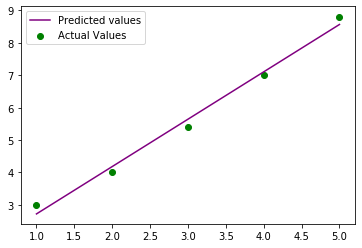

In [27]:
plt.scatter(X, Y, color = 'g',label = 'Actual Values')
plt.plot(X, y_predict1, color = 'purple',label = 'Predicted values')
plt.legend()

### 2. Multiple Linear Regression
- Multiple linear regression is an extension of simple linear regression.
- It is used to find relationship between multiple independent variables and dependent variable.
- **Formul:** Y = b0 + (b1 * X1) + (b2 * X2) +.........+ (bn * Xn)

### 3. Polynomial Regression
- To find the best way to draw a line through the curve data points we can use polynomial regression.
- To overcome the underfiting, we need to increse the complexity of model.
- **Formula:** Y = b0 + (b1 * X1) + (b2 * X1^2) + ....... + (bn* * X1^n)

In [28]:
df2 = pd.DataFrame({'Experience': [1,2,3,4,5,6,7,8,9], 
                    'Salary': [5000,6000,7200,8200,15000,25000,40000,55000,70000]})
df2

,Experience,Salary
0,1,5000
1,2,6000
2,3,7200
3,4,8200
4,5,15000
5,6,25000
6,7,40000
7,8,55000
8,9,70000


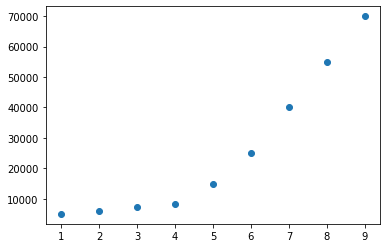

In [29]:
plt.scatter(df2['Experience'], df2['Salary'])

In [30]:
X = df2[['Experience']]
Y = df2['Salary']

In [31]:
## First check linear regression
from sklearn.linear_model import LinearRegression

In [32]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X,Y)
y_predict2 = lin_reg2.predict(X)
y_predict2

array([-6915.55555556,  1241.11111111,  9397.77777778, 17554.44444444,
       25711.11111111, 33867.77777778, 42024.44444444, 50181.11111111,
       58337.77777778])

In [33]:
## Now check with polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [34]:
poly = PolynomialFeatures()
poly

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [35]:
poly = PolynomialFeatures(degree = 2)
poly

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [36]:
X

,Experience
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


In [37]:
X_poly = poly.fit_transform(X)
X_poly
## degree = 2 --> 0, 1, 2
## X ** 0, X ** 1, X ** 2

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.],
       [ 1.,  7., 49.],
       [ 1.,  8., 64.],
       [ 1.,  9., 81.]])

- By applying polynomial model, the data points has been transformed.
- Now apply, linear regression to the new data points.

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lin_reg3 = LinearRegression()
lin_reg3.fit(X_poly, Y)
y_predict3 = lin_reg3.predict(X_poly)
y_predict3

array([ 6064.24242424,  4486.06060606,  5689.26406926,  9673.85281385,
       16439.82683983, 25987.18614719, 38315.93073593, 53426.06060606,
       71317.57575758])

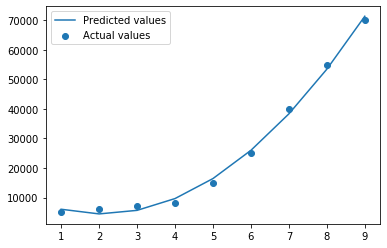

In [43]:
plt.scatter(X,Y, label = 'Actual values')
plt.plot(X,y_predict3, label = 'Predicted values')
plt.legend()